# Creating Models for IBDOCs

In [6]:
import os
import logging
import importlib
import ibnlp
importlib.reload(ibnlp)
from ibnlp import PrototypeDataset, BERTUtils, IBDOCFeaturizer, ModelContext, product_dict, PUNC_TABLE

# Define some constants and configurations
logging.getLogger().setLevel(logging.INFO)

ACCESS_TOKEN = 'WUpGevbWC9lsnTW8quNUtmWRdAEM89'

## 1. Load Dataset + Goldens
*Note that this can take a few minutes to run*

In [2]:
OMF_DATA = [
    'ib_sales/OMF/fs/Instabase%20Drive/test/other-paystubs/Batch1/out/s3_map_records/',
    'ib_sales/OMF/fs/Instabase%20Drive/test/other-paystubs/Batch2/out/s3_map_records/',
    'ib_sales/OMF/fs/Instabase%20Drive/test/other-paystubs/Batch3/out/s1_process_files/',
    'ib_sales/OMF/fs/Instabase%20Drive/test/other-paystubs/Batch4/out/s1_process_files/'
]
OMF_GOLDEN = [
    './omf_batch_1.csv',
    './omf_batch_2.csv',
    './omf_batch_3.csv',
    './omf_batch_4.csv'
]
OMF_MAPPING = ['ssn', 'last_4_ssn', 'per_end', 'pay_date', 'file', 'doc_type', 'template_name', 'per_begin', 'employee_name', 'employer_name', 'per_ss_tax', 'ytd_ss_tax', 'per_medicare_tax', 'ytd_medicare_tax', 'per_gross_pay', 'ytd_gross_pay', 'per_net_pay', 'ytd_net_pay']
OMF_GOLDEN_CONFIG = {
    'file_type': 'csv',
    'skip_first_row': True,
    'mapping': OMF_MAPPING,
    'identifier': 'file'
}
OMF_DATASET_CONFIG = {
    'file_type': 'ibdoc',
    'identifier': lambda path: os.path.basename(path).split('.ibdoc')[0]
}

omf_paystubs = PrototypeDataset(ACCESS_TOKEN, OMF_DATA, OMF_DATASET_CONFIG, OMF_GOLDEN, OMF_GOLDEN_CONFIG)
omf_paystubs.golden

INFO:root:Loading goldens from ./omf_batch_1.csv
INFO:root:Loading goldens from ./omf_batch_2.csv
INFO:root:Loading goldens from ./omf_batch_3.csv
INFO:root:Loading goldens from ./omf_batch_4.csv
INFO:root:Loading dataset from ib_sales/OMF/fs/Instabase%20Drive/test/other-paystubs/Batch1/out/s3_map_records/
INFO:root:Loading dataset from ib_sales/OMF/fs/Instabase%20Drive/test/other-paystubs/Batch2/out/s3_map_records/
INFO:root:Loading dataset from ib_sales/OMF/fs/Instabase%20Drive/test/other-paystubs/Batch3/out/s1_process_files/
INFO:root:Loading dataset from ib_sales/OMF/fs/Instabase%20Drive/test/other-paystubs/Batch4/out/s1_process_files/


,ssn,last_4_ssn,per_end,pay_date,doc_type,template_name,per_begin,employee_name,employer_name,per_ss_tax,ytd_ss_tax,per_medicare_tax,ytd_medicare_tax,per_gross_pay,ytd_gross_pay,per_net_pay,ytd_net_pay
APPELF__0089-000000009025750-00892881_&I100PYSTB_20191017005144_01000059-09025750-00892881-001_19_.pdf,,,10/06/2019,10/11/2019,PAYSTUB,other_paystub,09/23/2019,Ricky L. Tucker,"Warrior Met Coal Mining, LLC",243.22,7655.53,56.89,1790.41,4120.18,127617.74,2806.57,93308.95
APPELF__0093-000000009062560-00932811_&I100PYSTB_20191009185526_03000640-09062560-00932811-001_20_.pdf,,,09/22/2019,10/02/2019,PAYSTUB,other_paystub,,Richard Rios,Maricopa County,86.94,1545.14,20.33,361.36,1464,26032.81,954.41,
APPELF__0093-000000009062560-00932811_&I100PYSTB_20191009185526_03000640-09062560-00932811-002_26_.pdf,,,09/17/2019,09/26/2019,PAYSTUB,other_paystub,,"HAMILTON, RENEE MARTINE",Deer Valley Unified School District #97,,,,48.33,,,1543.26,
APPELF__0119-000000009035480-01192741_&I100PYSTB_20191003000906_05500019-09035480-01192741-001_2_.pdf,,,09/15/2019,09/20/2019,PAYSTUB,other_paystub,09/02/2019,Uta Carlotta Garrett,Southern CA Edison,194.83,3537.6,45.56,827.34,3360.42,65527.91,2570.26,46992.39
APPELF__0222-000000009033200-02222771_&I100PYSTB_20191007185720_09000315-09033200-02222771-001_24_.pdf,,,09/21/2019,09/27/2019,PAYSTUB,other_paystub,09/08/2019,MALDONADO,,,,15.43,,1072.57,,870.94,
APPELF__0222-000000009033200-02222771_&I100PYSTB_20191007185720_09000315-09033200-02222771-002_22_.pdf,,,09/21/2019,09/27/2019,PAYSTUB,other_paystub,09/08/2019,MALDONADO,,,,15.43,,1072.57,,870.94,
APPELF__0222-000000009033200-02222771_&I100PYSTB_20191007194030_09000315-09033200-02222771-003_16_.pdf,,,,,PAYSTUB,other_paystub,,,,,,,246.6,,18233.69,13937,
APPELF__0238-000000009032790-02382811_&I100PYSTB_20191009052855_05500138-09032790-02382811-001_6_.pdf,,,,09/19,PAYSTUB,other_paystub,10/01/19,BETTY T. YEE,M E SULLIVAN,230.19,,53.84,,4160,46107.87,2655.4,
APPELF__0238-000000009032790-02382811_&I100PYSTB_20191009052855_05500138-09032790-02382811-002_5_.pdf,,,,08/19,PAYSTUB,other_paystub,09/12/19,BETTY T. YEE,M E SULLIVAN,36.08,,8.44,,582,42043.55,365.21,
APPELF__0243-000000009018390-02432891_&I100PYSTB_20191017013800_14000385-09018390-02432891-001_12_.pdf,,,10/05/2019,10/11/2019,PAYSTUB,other_paystub,09/22/2019,Christina S Nevitt,"Hook-SupeRx, L.L.C",1323.41,26017.3,1323.41,26017.3,1411.4,27825.82,965.22,19546.14


] 9,999.99ii
-------------------------
-------------------------
-------------------------
-------------------------
[WE] 999)
-------------------------
[WE] TSERS
-------------------------
[WE] ]OASDI
[WE] ]]
[WE] iMarital
-------------------------
-------------------------
[WE] *>>
-------------------------
-------------------------
[WE] Nonproductive
[WE] Load
[WE] Minimum
[WE] Driv
[WE] Reimburseme
[WE] Mileage/Expense
[WE] US-9/9
[WE] Kronos
[WE] Fuel
[WE] Westerville.
-------------------------
-------------------------
-------------------------
-------------------------
-------------------------
-------------------------
[WE] Bankruptcy
-------------------------
[WE] 99,9999-Sep
-------------------------
-------------------------
-------------------------
-------------------------
-------------------------
[WE] SUMMARIZES
[WE] BENEFICIARY,
[WE] 99-99)
[WE] (Rev
[WE] 9999/999
-------------------------
[WE] y.
[WE] .9,99
[WE] 99DD
-------------------------
[WE] Region
[WE] Unt
----

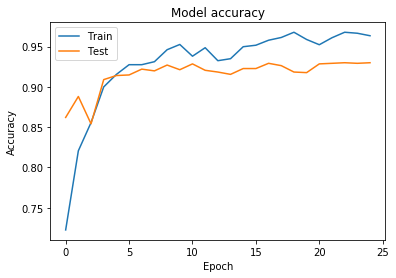

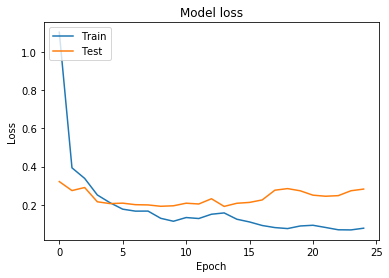

KeyError: 'val_acc'

In [11]:
import itertools
import numpy as np
import sklearn
import time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Start by varying 
params = {
    'batch_size': [32],#, 64, 128],
    'epochs': [25],
    'max_num_tokens': [5],
    'max_token_distance': [None],
    #'embedding_type': ['glove', 'bert'],
    'cardinal_only': [False],
    'balance_targets': [True],
    'additional_features': [[], ['is_number', 'is_company_indicator']],
    'pre_processing': [[], ['lower_case', 'remove_punc'], ['lower_case'], ['remove_punc']]
}

def create_sample_data(dataset, model_context):
    # Balance samples by removing some non-entity labeled datapoints
    samples, targets, warnings = dataset.generate_spatial_samples('employer_name', context)
    pos_idx = np.where(targets == 1)[0]
    num_pos_samples = len(pos_idx)

    neg_idxs_all = np.where(targets == 0)[0]
    np.random.shuffle(neg_idxs_all)
    neg_idx = neg_idxs_all[:num_pos_samples]

    idx_to_use = np.concatenate((pos_idx, neg_idx))

    filtered_samples = samples[idx_to_use]
    filtered_targets = targets[idx_to_use]

    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(filtered_samples, filtered_targets, test_size=0.3, random_state=0)
    return (X_train, X_test, y_train, y_test)

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

def train_model(X_train, X_test, y_train, y_test, model_context):

    # Neural network
    model = Sequential()
    model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=model_context.epochs, batch_size=model_context.batch_size)
    return model, history

def evaluate_model(model, history, model_context):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss']) 
    plt.title('Model loss') 
    plt.ylabel('Loss') 
    plt.xlabel('Epoch') 
    plt.legend(['Train', 'Test'], loc='upper left') 
    plt.show()
    return history.history['val_accuracy'][-1]
    
    
print("Trying on {} combinations of parameters".format(len(list(product_dict(**params)))))
results = []
for parameters in product_dict(**params):
    start = time.time()
    context = ModelContext(**parameters)
    print('Trying on following context:\n\t{}'.format(parameters))
    samples = create_sample_data(omf_paystubs, context)
    print('Input shape: {}'.format(samples[0].shape))
    model, history = train_model(*samples, context)
    acc = evaluate_model(model, history, context)
    res = (acc, context, history, model, time.time() - start)
    print((res[0], res[1], res[-1]))
    results.append(res)
    
for i, result in enumerate(results):
    print((i, result[0], result[1]))
    

In [12]:
print(results[np.argmax([r[0] for r in results])])

ValueError: attempt to get argmax of an empty sequence

In [ ]:
# Do some testing
def evaluate(dataset, model, context, threshold=0.60, distance_threshold=1.5):
    
    results = {}
    
    for dataset_file in list(dataset.dataset.keys()):
        try:
            ibdoc = dataset.dataset[dataset_file].get_joined_page()[0] # 20, 54, 70
            featurizer = IBDOCFeaturizer(ibdoc)
            fvs = featurizer.get_feature_vectors(context)
    #         print(ibdoc.get_text())
    #         print('=================================')
            predictions = model.predict(fvs)
            predictions = predictions.tolist()
            sequences = [[]]
            for i, classification in enumerate(predictions):
                if classification[0] > threshold:
                    token_to_add = featurizer.get_all_tokens()[i]
                    to_add_start, to_add_height = token_to_add['start_x'], token_to_add['line_height']
                    if len(sequences[-1]) > 0 and (to_add_start - sequences[-1][-1]['end_x']) <= distance_threshold * to_add_height:
                        sequences[-1].append(token_to_add)
                    else:
                        sequences.append([token_to_add])
                elif len(sequences[-1]) > 0:
                    sequences.append([])
            companies = [' '.join([ss['word'] for ss in s]) for s in sequences if len(s) > 1]
            results[dataset_file] = companies
        except Exception as e:
            print(e)
    return results

best_model_idx = np.argmax([r[0] for r in results])
best_model = results[best_model_idx][3]
best_context = results[best_model_idx][1]
found_companies = evaluate(omf_paystubs, best_model, best_context)
print(found_companies)

In [26]:
total = 0
found_count = 0
for cfile in found_companies:
    try:
        expected = omf_paystubs.golden.at[cfile, 'employer_name']
    except Exception as e:
        print(e)
        continue
    found = '\n\t\t'.join(found_companies[cfile])
    print(cfile[-10:])
    print('\t Found:\n\t\t{}'.format(found))
    print('\t Expected:\n\t\t{}'.format(expected))
    if expected:  
        total += 1
    expected_san = expected.lower().strip().translate(PUNC_TABLE)
    actual_san = [c.lower().strip().translate(PUNC_TABLE) for c in found_companies[cfile]]
    is_contained = any([(expected_san in a) for a in actual_san]) or any([(a in expected_san) for a in actual_san])
    if expected_san in actual_san or is_contained:
        found_count += 1
    else:
        print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
print(total)
print(found_count)
print('Recall: {}'.format(float(found_count)/float(total)))

NameError: name 'found_companies' is not defined

In [ ]:
# omf_paystubs.evaluate({k: {'employer_name': found_companies[k]} for k in found_companies}, {}, fields=['employer_name'])

In [ ]:
ibdoc = omf_paystubs.dataset[list(omf_paystubs.dataset.keys())[54]].get_joined_page()[0] # 20, 54, 70
featurizer = IBDOCFeaturizer(ibdoc)
fvs = featurizer.get_feature_vectors(context)
print(ibdoc.get_text())
print('=================================')
predictions = model.predict(fvs)
predictions = predictions.tolist()
sequences = [[]]
for i, classification in enumerate(predictions):
    if classification[0] > 0.99:
        token_to_add = featurizer.get_all_tokens()[i]
        to_add_start, to_add_height = token_to_add['start_x'], token_to_add['line_height']
        if len(sequences[-1]) > 0 and (to_add_start - sequences[-1][-1]['end_x']) <= 1.5 * to_add_height:
            sequences[-1].append(token_to_add)
        else:
            sequences.append([token_to_add])
    elif len(sequences[-1]) > 0:
        sequences.append([])
companies = [' '.join([ss['word'] for ss in s]) for s in sequences if len(s) > 1]
print(companies)